In [1]:
from utils import *

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
import lda_network

In [5]:
lda_network.lda_function([3,2])

AttributeError: 'list' object has no attribute 'numpy'

In [6]:
lda_network.interpolate_scipy(0.1)

array(-0.51756965)

In [2]:
import utils

In [3]:
from scipy.interpolate import interp1d

In [4]:
import scipy.interpolate

In [18]:
train_density, train_vxc, test_density, test_vxc, dfiles, vxcfiles = load_dataset_1to1('D:/LDA_fix2/', 150, 3292800, 0.85)

In [4]:
from pydens import Solver, NumpySampler, cart_prod, add_tokens
from pydens import plot_loss, plot_pair_1d, plot_2d, plot_sections_2d, plot_sections_3d
add_tokens()

In [5]:
from pydens.tokens import make_token

In [6]:
interp_token = make_token(name='interpolate_numpy', namespaces = [lda_network])

In [23]:
unique_density, unique_indices = np.unique(train_density[:,0], return_index = True)
order = np.argsort(unique_density)
f = interp1d(unique_density[order], train_vxc[:,0][unique_indices][order], kind='cubic')

In [24]:
interp_token(np.array([0.1,0.2]))

array([-0.51756965, -0.64139605])

In [25]:
f_interp = lambda xx: np.interp(xx, unique_density[order], train_vxc[:,0][unique_indices][order])

In [29]:
f_interp([0.1, 0.2])

array([-0.51756994, -0.64133201])

In [7]:
# describing pde-problem in pde-dict
pde = {
    'n_dims': 1,
    'form': lambda u, x: u + x*D(u, x) - interp_token(x),
    'initial_condition': 0
}

# put it together in model-config
config = {
    'pde': pde,
    'track': {'dudx': lambda u, x: D(u, x)} # allows to later fetch this value from the model
}

# uniform sampling scheme
s = NumpySampler('uniform', low = 2e-21, high = 0.2)

AttributeError: 'NumpySampler' object has no attribute 'dtype'

In [9]:
np.max(train_density)

0.2037474

In [10]:
# train the network on batches of 100 points
dg = Solver(config)
dg.fit(batch_size=1000, sampler=s, n_iters=2000, bar='notebook')

ValueError: setting an array element with a sequence.

In [17]:
f.dtype

numpy.float64

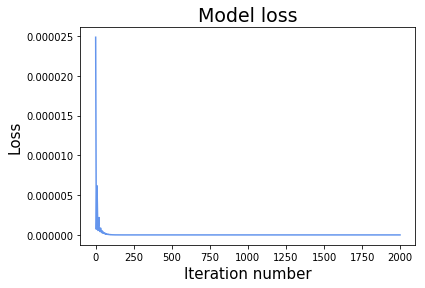

In [20]:
plot_loss(dg.loss, color='cornflowerblue')